# Project and Presentation - Analytics Experience
## Aaron Bromeland

### Purpose:




### Required Imports

In [1]:
# imports required
import requests
import pandas as pd
import numpy as np
import json
import re
from lxml import html
#!pip3 install yfinance
import yfinance as yf
import time

#!pip3 install afinn
from afinn import Afinn
#!pip3 install textblob
from textblob import TextBlob
#!pip3 install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#!pip3 install pysentiment2
import pysentiment2 as ps

from sklearn.preprocessing import MinMaxScaler
import numpy as np

import matplotlib.pyplot as plt                      # a library for visualization

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
from sklearn.svm import l1_min_c
from sklearn.linear_model import LogisticRegressionCV

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation  #LDA module from sklearn. 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

#!pip install scipy --upgrade

### Pull Linked In Data

In [2]:
# Print the shape and save the data for later use
df = pd.read_pickle("LinkedIn_All.pkl")
print(df.shape)


(32169, 14)


In [8]:
company = df[df['jobCompnay'].str.contains("Transamerica") == True]
print(company.shape)
company


(8, 14)


,jobTitle,jobCompnay,jobID,jobLink,jobLocation,jobState,jobKeyword,jobDetails,jobText,jobBullets,seniorityLevel,employmentType,jobFunction,industry
7614,Document Management Coordinator,Transamerica,3245888733,https://www.linkedin.com/jobs/view/document-ma...,"Cedar Rapids, IA",Iowa,Customer Service,Job FamilyAdm - Document ManagementWho We AreT...,"[, Adm - Document Management, Transamerica has...","[Sort, deliver and pick up mail as scheduled t...",Entry level,Full-time,Administrative,Insurance and Financial Services
7795,Channel Marketing Specialist - Employee Benefits,Transamerica,3231887546,https://www.linkedin.com/jobs/view/channel-mar...,"Cedar Rapids, IA",Iowa,Customer Service,Job FamilyMarketing - GeneralWho We AreTransam...,"[, Marketing - General, Transamerica has been ...",[Develop detailed plans to monitor and track p...,Entry level,Full-time,Marketing and Sales,Insurance and Financial Services
8637,"Divisional Sales Manager, Institutional Asset ...",Transamerica,3273838066,https://www.linkedin.com/jobs/view/divisional-...,"Cedar Rapids, IA",Iowa,Insurance Commissions,Job FamilyRegional / Field SalesWho We AreTran...,"[, Regional / Field Sales, Transamerica has be...",[Manage a team of external sales professionals...,Entry level,Full-time,Sales and Business Development,Insurance and Financial Services
9064,Channel Marketing Specialist - Employee Benefits,Transamerica,3231887546,https://www.linkedin.com/jobs/view/channel-mar...,"Cedar Rapids, IA",Iowa,Insurance Marketing,Job FamilyMarketing - GeneralWho We AreTransam...,"[, Marketing - General, Transamerica has been ...",[Develop detailed plans to monitor and track p...,Entry level,Full-time,Marketing and Sales,Insurance and Financial Services
9102,Digital Email Marketing Specialist - Remote,Transamerica,3272454654,https://www.linkedin.com/jobs/view/digital-ema...,"Cedar Rapids, IA",Iowa,Insurance Marketing,Job FamilyDigital / Online MarketingWho We Are...,"[, Digital / Online Marketing, Transamerica ha...",[Create and execute email marketing initiative...,Entry level,Full-time,Marketing and Sales,Insurance and Financial Services
9145,"Divisional Sales Manager, Institutional Asset ...",Transamerica,3273838066,https://www.linkedin.com/jobs/view/divisional-...,"Cedar Rapids, IA",Iowa,Insurance Marketing,Job FamilyRegional / Field SalesWho We AreTran...,"[, Regional / Field Sales, Transamerica has be...",[Manage a team of external sales professionals...,Entry level,Full-time,Sales and Business Development,Insurance and Financial Services
9236,State Filing Analyst (Work From Home),Transamerica,3278054730,https://www.linkedin.com/jobs/view/state-filin...,"Cedar Rapids, IA",Iowa,Insurance New Product Development,Job FamilyRegulatory ComplianceWho We AreTrans...,"[, Regulatory Compliance, Transamerica has bee...",[Performs research and analysis to determine s...,Entry level,Full-time,Business Development and Sales,Insurance and Financial Services
9278,Digital Email Marketing Specialist - Remote,Transamerica,3272454654,https://www.linkedin.com/jobs/view/digital-ema...,"Cedar Rapids, IA",Iowa,Insurance REgulatory and Compliance,Job FamilyDigital / Online MarketingWho We Are...,"[, Digital / Online Marketing, Transamerica ha...",[Create and execute email marketing initiative...,Entry level,Full-time,Marketing and Sales,Insurance and Financial Services


In [3]:
df

,jobTitle,jobCompnay,jobID,jobLink,jobLocation,jobState,jobKeyword,jobDetails,jobText,jobBullets,seniorityLevel,employmentType,jobFunction,industry
0,Claims Examiner,Homeowner Services Group,3267909391,https://www.linkedin.com/jobs/view/claims-exam...,"Alton, IL",Illinois,Claims Examiner,"In joining Homeowner Services (HOS), you becom...","[, ]",[Understand database applications and operatin...,Entry level,Full-time,Finance and Sales,Consumer Services
1,Claims Analyst,"The Custom Companies, Inc.",3281175315,https://www.linkedin.com/jobs/view/claims-anal...,"Northlake, IL",Illinois,Claims Examiner,The Custom Companies is a Full-Service Transpo...,"[, is a Full-Service Transportation company an...","[Reviews manages, and dispositions cargo claim...",Entry level,Full-time,Strategy/Planning and Information Technology,Truck Transportation
2,Spanish Fraud Customer Service (Remote),Discover Financial Services,3278718024,https://www.linkedin.com/jobs/view/spanish-fra...,"Illinois, United States",Illinois,Claims Examiner,Discover. A brighter future.Great News! You ar...,"[, To receive the bonus, you must be employed ...","[Sign-on Bonus: up to $2K*, Andâ¦ We offer 10...",Entry level,Full-time,Finance and Sales,"Banking, Financial Services, and Hospitality"
3,Claims Analyst,Reynolds Consumer Products,3282044939,https://www.linkedin.com/jobs/view/claims-anal...,"Lake Forest, IL",Illinois,Claims Examiner,Job DescriptionJob Title: Claims AnalystCity: ...,"[, Claims Analyst, Lake Forest /, Illinois, Jo...",[Review policies to determine which charges ar...,Entry level,Full-time,Finance and Sales,Manufacturing
4,Property Claims Adjuster -- Commercial Lines,Liberty Mutual Insurance,3241033739,https://www.linkedin.com/jobs/view/property-cl...,"Chicago, IL",Illinois,Claims Examiner,Property Field Claims AdjusterAdvance your Cla...,"[, Are you looking for an opportunity to join ...","[ Conducts a prompt, thorough and fair investi...",Entry level,Full-time,Finance and Sales,Insurance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32164,U/W Tech - Natl Accts,Sentry,3274114775,https://www.linkedin.com/jobs/view/u-w-tech-na...,"Stevens Point, WI",Wisconsin,Underwriters,Performs underwriting technician duties provid...,[Performs underwriting technician duties provi...,"[Work closely with Underwriters, Underwriter E...",Entry level,Full-time,Accounting/Auditing and Finance,Insurance Agencies and Brokerages
32165,System Support Technician,Old Republic Surety Company,3275628326,https://www.linkedin.com/jobs/view/system-supp...,"Brookfield, WI",Wisconsin,Underwriters,DescriptionOld Republic Surety Company (ORSC) ...,"[, (ORSC) is currently seeking a, to join its,...",[Answer service desk phone calls and monitor s...,Entry level,Full-time,Other,Insurance
32166,Customer Care Representative - Personal Lines ...,West Bend Mutual Insurance,3102078559,https://www.linkedin.com/jobs/view/customer-ca...,"West Bend, WI",Wisconsin,Underwriters,(Please note- we are open to filling this role...,"[, As a licensed agent, handle calls in our Pe...",[Our Customer Care Center is open Monday - Fri...,Entry level,Full-time,Other,Insurance
32167,Accounting Specialist (Hybrid),Old Republic Surety Company,3177057689,https://www.linkedin.com/jobs/view/accounting-...,"Brookfield, WI",Wisconsin,Underwriters,DescriptionOld Republic Surety Company (ORSC) ...,"[, (ORSC) is currently seeking an, to join its...",[Responsible for timely and accurate month-end...,Entry level,Full-time,Accounting/Auditing and Finance,Insurance


### Sentiment Analysis 

- Running the sentiment Analysis of all documents, and will plot this against the changes in stock price that are obtained for the same time period. 
- The sentiment analizers that were used are below:
    1. AFINN
    2. TextBlob
    3. VADER
    4. LM - Loughran and McDonald Financial Sentiment Dictionaries

In [4]:
# WARNING - THIS CELL WILL TAKE A LONG TIME TO RUN

# AFINN Sentiment Analysis Scores
afinn = Afinn(emoticons=True)
df["AFINN"]=[afinn.score(s) for s in df.jobDetails]

# TextBlob Sentiment Analysis Scores
df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in df.jobDetails]

# VADER Sentiment Analysis Scores
analyzer=SentimentIntensityAnalyzer()
df["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in df.jobDetails]

# Loughran and McDonald Sentiment Scores
lm = ps.LM()
df['LMTitle'] = 0
for i in range(len(df['jobDetails'])):
    tokens = lm.tokenize(df['jobDetails'][i])
    score = lm.get_score(tokens)
    df.loc[i,"LMTitle"]=score["Polarity"]

df

,jobTitle,jobCompnay,jobID,jobLink,jobLocation,jobState,jobKeyword,jobDetails,jobText,jobBullets,seniorityLevel,employmentType,jobFunction,industry,AFINN,TextBlob,VADER,LMTitle
0,Claims Examiner,Homeowner Services Group,3267909391,https://www.linkedin.com/jobs/view/claims-exam...,"Alton, IL",Illinois,Claims Examiner,"In joining Homeowner Services (HOS), you becom...","[, ]",[Understand database applications and operatin...,Entry level,Full-time,Finance and Sales,Consumer Services,76.0,0.203576,0.9993,0.038462
1,Claims Analyst,"The Custom Companies, Inc.",3281175315,https://www.linkedin.com/jobs/view/claims-anal...,"Northlake, IL",Illinois,Claims Examiner,The Custom Companies is a Full-Service Transpo...,"[, is a Full-Service Transportation company an...","[Reviews manages, and dispositions cargo claim...",Entry level,Full-time,Strategy/Planning and Information Technology,Truck Transportation,22.0,0.196514,0.9908,-0.161290
2,Spanish Fraud Customer Service (Remote),Discover Financial Services,3278718024,https://www.linkedin.com/jobs/view/spanish-fra...,"Illinois, United States",Illinois,Claims Examiner,Discover. A brighter future.Great News! You ar...,"[, To receive the bonus, you must be employed ...","[Sign-on Bonus: up to $2K*, Andâ¦ We offer 10...",Entry level,Full-time,Finance and Sales,"Banking, Financial Services, and Hospitality",39.0,0.170775,0.9966,0.181818
3,Claims Analyst,Reynolds Consumer Products,3282044939,https://www.linkedin.com/jobs/view/claims-anal...,"Lake Forest, IL",Illinois,Claims Examiner,Job DescriptionJob Title: Claims AnalystCity: ...,"[, Claims Analyst, Lake Forest /, Illinois, Jo...",[Review policies to determine which charges ar...,Entry level,Full-time,Finance and Sales,Manufacturing,69.0,0.192801,0.9956,0.407407
4,Property Claims Adjuster -- Commercial Lines,Liberty Mutual Insurance,3241033739,https://www.linkedin.com/jobs/view/property-cl...,"Chicago, IL",Illinois,Claims Examiner,Property Field Claims AdjusterAdvance your Cla...,"[, Are you looking for an opportunity to join ...","[ Conducts a prompt, thorough and fair investi...",Entry level,Full-time,Finance and Sales,Insurance,68.0,0.262182,0.9988,-0.228571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32164,U/W Tech - Natl Accts,Sentry,3274114775,https://www.linkedin.com/jobs/view/u-w-tech-na...,"Stevens Point, WI",Wisconsin,Underwriters,Performs underwriting technician duties provid...,[Performs underwriting technician duties provi...,"[Work closely with Underwriters, Underwriter E...",Entry level,Full-time,Accounting/Auditing and Finance,Insurance Agencies and Brokerages,100.0,0.284117,0.9993,0.705882
32165,System Support Technician,Old Republic Surety Company,3275628326,https://www.linkedin.com/jobs/view/system-supp...,"Brookfield, WI",Wisconsin,Underwriters,DescriptionOld Republic Surety Company (ORSC) ...,"[, (ORSC) is currently seeking a, to join its,...",[Answer service desk phone calls and monitor s...,Entry level,Full-time,Other,Insurance,100.0,0.204027,0.9990,0.705882
32166,Customer Care Representative - Personal Lines ...,West Bend Mutual Insurance,3102078559,https://www.linkedin.com/jobs/view/customer-ca...,"West Bend, WI",Wisconsin,Underwriters,(Please note- we are open to filling this role...,"[, As a licensed agent, handle calls in our Pe...",[Our Customer Care Center is open Monday - Fri...,Entry level,Full-time,Other,Insurance,8.0,0.008807,0.9274,0.272727
32167,Accounting Specialist (Hybrid),Old Republic Surety Company,3177057689,https://www.linkedin.com/jobs/view/accounting-...,"Brookfield, WI",Wisconsin,Underwriters,DescriptionOld Republic Surety Company (ORSC) ...,"[, (ORSC) is currently seeking an, to join its...",[Responsible for timely and accurate month-end...,Entry level,Full-time,Accounting/Auditing and Finance,Insurance,59.0,0.154046,0.9979,0.826087


In [5]:
# Write Out Results
df.to_csv("Job_Sentiment_Scores.csv",index=False)

### Visualize Sentiment Analysis 
    1. Graph All Sentiment Scores together
    2. Graph Daily, Weekly, and Monthly Changes
    3. Merge Sentiment Scores with Stock Data 
    4. Graph Stock data with Sentiment Scores

#### Re-load Location - Allows for csv to be reloaded and merged with original data.

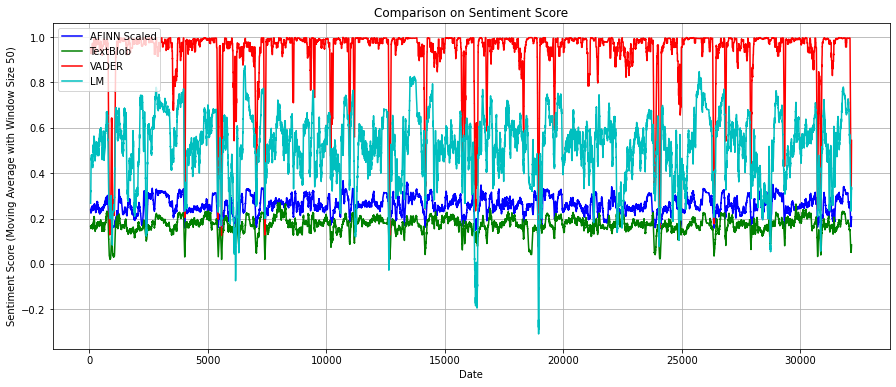

In [9]:
# Graph all stock data with Sentiment Data - First Scale difference data to be graphed and compared with sentiment data.
df['AFINN_SCALE'] = MinMaxScaler().fit_transform(np.array(df['AFINN']).reshape(-1,1))

# inline display of plots
%matplotlib inline
plt.figure(figsize=(15, 6))

plt.plot(df.index, df.AFINN_SCALE.rolling(window=50).mean(), "-b", label="AFINN Scaled")
plt.plot(df.index, df.TextBlob.rolling(window=50).mean(), "-g", label="TextBlob")
plt.plot(df.index, df.VADER.rolling(window=50).mean(), "-r", label="VADER")
plt.plot(df.index, df.LMTitle.rolling(window=50).mean(), "-c", label="LM")

plt.legend(loc="upper left")
plt.title("Comparison on Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 50)")
plt.grid(axis='both')
plt.show()

### Summary Statistics on Data Set

1. Obtain the character counts and throw out data that is too small.
2. Create DTM's
    1. Unigrams
    2. Bigrams
    3. Trigrams
    
    
#### Remove and Review of Small Character Count Documents

In [11]:
df['characters'] = [len(s) for s in df['jobDetails']]
print(f"Average character length: {df['characters'].mean()}")
print(f"Minimum character length: {df['characters'].min()}")
print(f"Maximum character length: {df['characters'].max()}")

Average character length: 3664.13084024993
Minimum character length: 0
Maximum character length: 21656


In [16]:
df_small = df[df['characters']<1].copy()
print(df_small.shape)
df_small

(473, 20)


,jobTitle,jobCompnay,jobID,jobLink,jobLocation,jobState,jobKeyword,jobDetails,jobText,jobBullets,seniorityLevel,employmentType,jobFunction,industry,AFINN,TextBlob,VADER,LMTitle,AFINN_SCALE,characters
20,Patient Services Specialist (Patient Outreach ...,University of Illinois Chicago,3279475984,https://www.linkedin.com/jobs/view/patient-ser...,"Chicago, IL",Illinois,Claims Examiner,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0
45,Client Services Representative,LHH,3284414491,https://www.linkedin.com/jobs/view/client-serv...,"Oak Brook, IL",Illinois,Claims Examiner,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0
63,Bilingual Healthcare Customer Service Represen...,Aston Carter,3284419710,https://www.linkedin.com/jobs/view/bilingual-h...,"Arlington Heights, IL",Illinois,Claims Examiner,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0
70,Front Desk Agent,Aimbridge Hospitality,3278097704,https://www.linkedin.com/jobs/view/front-desk-...,"Bedford Park, IL",Illinois,Claims Examiner,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0
107,Customer Service Specialist,Rural King Farm & Home Store,3281931943,https://www.linkedin.com/jobs/view/customer-se...,"Murphysboro, IL",Illinois,Claims Examiner,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30879,Dental Office Assistant - Business Assistant,Heartland Dental,3274876829,https://www.linkedin.com/jobs/view/dental-offi...,"Glendale, WI",Wisconsin,Insurance Claims Analyst,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0
30887,Administrative Assistant,"Winter Services, LLC",3273620434,https://www.linkedin.com/jobs/view/administrat...,"Milwaukee, WI",Wisconsin,Insurance Claims Analyst,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0
31263,Product Developer,Georgia-Pacific LLC,3184605251,https://www.linkedin.com/jobs/view/product-dev...,"Neenah, WI",Wisconsin,Insurance Legal,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0
31905,Tax Professional II,H&R Block,3279948600,https://www.linkedin.com/jobs/view/tax-profess...,"Monona, WI",Wisconsin,Insurance Marketing,,[],[],,,,,0.0,0.0,0.0,0.0,0.107345,0


In [ ]:
#df_small['text'][556]

In [ ]:
#df_small['text'][991]

In [21]:
df_all = df[df['characters']>2].copy()
df_all.sort_values(by='jobTitle',ascending=False,inplace=True)
df_all.reset_index(inplace=True,drop=True)
print(df_all.shape)
df_all

(31696, 20)


,jobTitle,jobCompnay,jobID,jobLink,jobLocation,jobState,jobKeyword,jobDetails,jobText,jobBullets,seniorityLevel,employmentType,jobFunction,industry,AFINN,TextBlob,VADER,LMTitle,AFINN_SCALE,characters
0,🐯 Technical Support Specialist,Tigerpaw Software,3281940211,https://www.linkedin.com/jobs/view/%F0%9F%90%A...,"Bellevue, NE",Nebraska,Customer Service,Remote and Local Applicants Welcomed**Tigerpaw...,"[, Tigerpaw is on the hunt for a Technical Sup...","[Remote and Local Applicants Welcomed**, Deliv...",Entry level,Full-time,Information Technology,Software Development,159.0,0.207588,0.9994,0.534884,0.556497,6166
1,service clerk,SpartanNash,3282037513,https://www.linkedin.com/jobs/view/service-cle...,"Mishawaka, IN",Indiana,Customer Service,"At SpartanNash, we deliver the ingredients for...","[At SpartanNash, we deliver the ingredients fo...","[Manage the front-end, scanning, and receiving...",Entry level,Full-time,Other,Retail Groceries,94.0,0.147541,0.9993,0.684211,0.372881,4838
2,office,"Badger Federal Services, Inc.",3274860103,https://www.linkedin.com/jobs/view/office-at-b...,"Oshkosh, WI",Wisconsin,Insurance Agent,JOB REQUIREMENTS: Compile and record employee ...,[JOB REQUIREMENTS: Compile and record employee...,[],Entry level,Full-time,Administrative,Truck Transportation,3.0,-0.039464,0.4708,0.428571,0.115819,1537
3,office,"Badger Federal Services, Inc.",3274860103,https://www.linkedin.com/jobs/view/office-at-b...,"Oshkosh, WI",Wisconsin,New Business Processor,JOB REQUIREMENTS: Compile and record employee ...,[JOB REQUIREMENTS: Compile and record employee...,[],Entry level,Full-time,Administrative,Truck Transportation,3.0,-0.039464,0.4708,0.428571,0.115819,1537
4,office,"Badger Federal Services, Inc.",3274860103,https://www.linkedin.com/jobs/view/office-at-b...,"Oshkosh, WI",Wisconsin,Insurance Claims Analyst,JOB REQUIREMENTS: Compile and record employee ...,[JOB REQUIREMENTS: Compile and record employee...,[],Entry level,Full-time,Administrative,Truck Transportation,3.0,-0.039464,0.4708,0.428571,0.115819,1537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31691,"$2,000 PAID TRAINING- Sales Representative",DaBella,3280369213,https://www.linkedin.com/jobs/view/%242-000-pa...,"Washington Court House, OH",Ohio,Insurance Sales,Job DescriptionBuild your career from the grou...,"[, Build your career from the ground floor of ...",[Leadership. Experience at building a team. Wo...,Entry level,Full-time,Sales and Business Development,Construction,27.0,0.182328,0.9915,0.833333,0.183616,2007
31692,"$2,000 PAID TRAINING- Sales Representative",DaBella,3280369213,https://www.linkedin.com/jobs/view/%242-000-pa...,"Washington Court House, OH",Ohio,Insurance Marketing,Job DescriptionBuild your career from the grou...,"[, Build your career from the ground floor of ...",[Leadership. Experience at building a team. Wo...,Entry level,Full-time,Sales and Business Development,Construction,27.0,0.182328,0.9915,0.833333,0.183616,2007
31693,"$2,000 PAID TRAINING- Sales Representative",DaBella,3278172362,https://www.linkedin.com/jobs/view/%242-000-pa...,"Minneapolis, MN",Minnesota,Insurance Agent,Build your career from the ground floor of Ame...,[Build your career from the ground floor of Am...,[Leadership. Experience at building a team. Wo...,Entry level,Full-time,Sales and Business Development,Construction,28.0,0.182328,0.9915,0.846154,0.186441,1990
31694,$18/hr - $25/hr - 2nd Or 3rd Shift - Machine O...,Aerotek,3284635290,https://www.linkedin.com/jobs/view/%2418-hr-%2...,"Wooster, OH",Ohio,Insurance HR,Call or Text Ian at 330-224-1231 to set up an ...,"[, About Aerotek:, We know that a company's su...",[Call or Text Ian at 330-224-1231 to set up an...,Entry level,Full-time,Production,Staffing and Recruiting,42.0,0.226127,0.9925,0.666667,0.225989,2614


In [22]:
print(f"Average character length: {df_all['characters'].mean()}")
print(f"Minimum character length: {df_all['characters'].min()}")
print(f"Maximum character length: {df_all['characters'].max()}")

Average character length: 3718.8107332155478
Minimum character length: 10
Maximum character length: 21656


#### Creation Of DTM's

##### Unigrams - Use of LM Dictionary

In [23]:
custom_stop_words = ['moneytoken','font','serif','famili','helvetica','size',
                                                            'includ','arial','px','form','weight','color','text',
                                                            'align','de','file','solid','e','c','b','k','f','r',
                    'p','g','n','q','h']

In [25]:
# Use LM dictionary for DTM - No Stop word Removal
lm = ps.LM()
vectorizer = CountVectorizer(tokenizer = lm.tokenize)
DTM = vectorizer.fit_transform(df_all['jobDetails'])

In [27]:
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(10)

,Term,Frequency
0,work,111228
1,custom,100615
2,servic,92804
3,s,87383
4,on,86132
5,provid,74536
6,requir,73567
7,tax,72309
8,team,71915
9,experi,69887


In [29]:
# Use LM dictionary for DTM - No Stop word Removal except custom stop words
lm = ps.LM()
vectorizer = CountVectorizer(tokenizer = lm.tokenize,stop_words=custom_stop_words)
DTM = vectorizer.fit_transform(df_all['jobDetails'])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(10)

,Term,Frequency
0,work,111228
1,custom,100615
2,servic,92804
3,s,87383
4,on,86132
5,provid,74536
6,requir,73567
7,tax,72309
8,team,71915
9,experi,69887


In [30]:
# Use LM dictionary for DTM - Stop Word Removal
nltk_stopwords = nltk.corpus.stopwords.words("english") + custom_stop_words
vectorizer = CountVectorizer(tokenizer = lm.tokenize,stop_words=nltk_stopwords)
DTM = vectorizer.fit_transform(df_all['jobDetails'])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(10)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\ab81004/nltk_data'
    - 'C:\\Users\\ab81004\\Anaconda3\\nltk_data'
    - 'C:\\Users\\ab81004\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\ab81004\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ab81004\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


##### Bi-grams - Use LM Dictionary and custom Stop word List

In [ ]:
vectorizer = CountVectorizer(tokenizer = lm.tokenize,ngram_range=(2,2),stop_words=custom_stop_words)
DTM = vectorizer.fit_transform(df_all['jobDetails'])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(10)

In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words("english") + custom_stop_words
vectorizer = CountVectorizer(tokenizer = lm.tokenize,stop_words=nltk_stopwords,ngram_range=(2,2))
DTM = vectorizer.fit_transform(df_all['jobDetails'])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(10)

##### Tri-grams - LM Tokenizer with custom stop word list

In [ ]:
vectorizer = CountVectorizer(tokenizer = lm.tokenize,ngram_range=(3,3),stop_words = custom_stop_words)
DTM = vectorizer.fit_transform(df_all['jobDetails'])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(10)

In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words("english") + custom_stop_words
vectorizer = CountVectorizer(tokenizer = lm.tokenize,stop_words=nltk_stopwords,ngram_range=(3,3))
DTM = vectorizer.fit_transform(df_all['jobDetails'])
dffreq = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                   'Frequency': DTM.sum(axis=0).tolist()[0]
                  })

dffreq.sort_values(by="Frequency",inplace=True,ascending=False)
dffreq.reset_index(inplace=True,drop=True)
dffreq.head(10)

##### Topic Model

In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words("english") + custom_stop_words
vectorizer = CountVectorizer(tokenizer = lm.tokenize,stop_words=nltk_stopwords,ngram_range=(1,1))
DTM =vectorizer.fit_transform(df_all['text'])


num_topics=[1,2,3,4,5,6,7,8,9,10,11,12,13]
lda = LatentDirichletAllocation(n_jobs=-1,   
                                max_iter=10,  
                                random_state=2021 
                               )
perplexity=[]
for i in num_topics:
    print(i)
    lda.set_params(n_components=i)
    lda.fit(DTM)
    perplexity.append(lda.perplexity(DTM))

plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

In [ ]:
lda = LatentDirichletAllocation(n_components=4,
                                n_jobs=-1,   
                                max_iter=20,   
                                random_state=2021 
                               )
lda.fit(DTM)

In [ ]:
#Create the top words for each topic and put them together in the same data frame.
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names())
TermOfTopic =pd.DataFrame([])
for i in range(4):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
TermOfTopic

In [ ]:
df_main = df_all[['form','text','filingDate']]
DTopicM = pd.DataFrame(lda.transform(DTM))
dfnew = pd.concat([df_main, DTopicM], axis=1)
dfnew.sort_values(by=0,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

In [ ]:
dfnew.text[0]

In [ ]:
dfnew.sort_values(by=1,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(10)

In [ ]:
dfnew.text[4]

In [ ]:
dfnew.sort_values(by=2,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

In [ ]:
dfnew.sort_values(by=3,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words("english") + custom_stop_words
vectorizer = CountVectorizer(tokenizer = lm.tokenize,stop_words=nltk_stopwords,ngram_range=(2,2))
DTM =vectorizer.fit_transform(df_all['text'])


num_topics=[1,2,3,4,5,6,7,8,9,10,11,12,13]
lda = LatentDirichletAllocation(n_jobs=-1,   
                                max_iter=10,  
                                random_state=2021 
                               )
perplexity=[]
for i in num_topics:
    print(i)
    lda.set_params(n_components=i)
    lda.fit(DTM)
    perplexity.append(lda.perplexity(DTM))

plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

In [ ]:
lda = LatentDirichletAllocation(n_components=3,
                                n_jobs=-1,   
                                max_iter=20,   
                                random_state=2021 
                               )
lda.fit(DTM)

In [ ]:
#Create the top words for each topic and put them together in the same data frame.
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names())
TermOfTopic =pd.DataFrame([])
for i in range(3):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
TermOfTopic

In [ ]:
df_main = df_all[['form','text','filingDate']]
DTopicM = pd.DataFrame(lda.transform(DTM))
dfnew = pd.concat([df_main, DTopicM], axis=1)
dfnew.sort_values(by=0,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

In [ ]:
dfnew.sort_values(by=1,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

In [ ]:
dfnew.sort_values(by=2,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(10)


In [ ]:
nltk_stopwords = nltk.corpus.stopwords.words("english") + custom_stop_words
vectorizer = CountVectorizer(tokenizer = lm.tokenize,stop_words=nltk_stopwords,ngram_range=(3,3))
DTM =vectorizer.fit_transform(df_all['text'])


num_topics=[1,2,3,4,5,6,7,8,9,10,11,12,13]
lda = LatentDirichletAllocation(n_jobs=-1,   
                                max_iter=10,  
                                random_state=2021 
                               )
perplexity=[]
for i in num_topics:
    print(i)
    lda.set_params(n_components=i)
    lda.fit(DTM)
    perplexity.append(lda.perplexity(DTM))

plt.plot(num_topics, perplexity)
plt.xlabel('Num. of Topics')
plt.ylabel('Perplexity')

In [ ]:
lda = LatentDirichletAllocation(n_components=3,
                                n_jobs=-1,   
                                max_iter=20,   
                                random_state=2021 
                               )
lda.fit(DTM)

In [ ]:
#Create the top words for each topic and put them together in the same data frame.
temparray = preprocessing.normalize(lda.components_,norm="l1")
TTopicM = pd.DataFrame(np.transpose(temparray), index = vectorizer.get_feature_names())
TermOfTopic =pd.DataFrame([])
for i in range(3):
    TermOfTopic[i]=(list(TTopicM.sort_values(by=i,ascending=False).iloc[:10,i].index))
TermOfTopic

In [ ]:
df_main = df_all[['form','text','filingDate']]
DTopicM = pd.DataFrame(lda.transform(DTM))
dfnew = pd.concat([df_main, DTopicM], axis=1)
dfnew.sort_values(by=0,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

In [ ]:
dfnew.sort_values(by=1,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

In [ ]:
dfnew.sort_values(by=2,ascending=False,inplace=True)
dfnew.reset_index(inplace=True,drop=True)
dfnew.head(5)

### Data Questions

1.	Which standard forms filed with the SEC have the highest sentiment scores?

In [ ]:
df_forms = df.copy()
df_forms.sort_values(by='form',ascending=False,inplace=True)
df_forms.reset_index(inplace=True,drop=True)
df_forms = df_forms.set_index(['form',df.index])
df_forms

In [ ]:
sentiment = df_forms[['AFINN','TextBlob','VADER','LMTitle']].groupby(level='form').mean()
df_sent = pd.DataFrame([])
for i in ['AFINN','TextBlob','VADER','LMTitle']:
    df_sent[i] = (list(sentiment.sort_values(by=i,ascending=False)[i][:10].index))
df_sent

In [ ]:
sentiment = df_forms[['AFINN','TextBlob','VADER','LMTitle']].groupby(level='form').max()
df_sent = pd.DataFrame([])
for i in ['AFINN','TextBlob','VADER','LMTitle']:
    df_sent[i] = (list(sentiment.sort_values(by=i,ascending=False)[i][:10].index))
df_sent

In [ ]:
sentiment = df_forms[['AFINN','TextBlob','VADER','LMTitle']].groupby(level='form').min()
df_sent = pd.DataFrame([])
for i in ['AFINN','TextBlob','VADER','LMTitle']:
    df_sent[i] = (list(sentiment.sort_values(by=i,ascending=True)[i][:10].index))
df_sent

In [ ]:
sentiment = df_forms[['AFINN','TextBlob','VADER','LMTitle']].groupby(level='form').var()
df_sent = pd.DataFrame([])
for i in ['AFINN','TextBlob','VADER','LMTitle']:
    df_sent[i] = (list(sentiment.sort_values(by=i,ascending=False)[i][:10].index))
df_sent

In [ ]:
sentiment = df_forms[['AFINN','TextBlob','VADER','LMTitle']].groupby(level='form').std()
df_sent = pd.DataFrame([])
for i in ['AFINN','TextBlob','VADER','LMTitle']:
    df_sent[i] = (list(sentiment.sort_values(by=i,ascending=False)[i][:10].index))
df_sent

In [ ]:
#print(df_all[df_all['LMTitle'] == df_all['LMTitle'].max()])
#df_all['text'][842]

In [ ]:
df_8K = df_all[df_all['form']=='8-K']
max_form = df_8K[df_8K['LMTitle'] == df_8K['LMTitle'].max()]
max_form = max_form[['form','filingDate','LMTitle','Adj Close']]
max_form


In [ ]:
#print(df_all[df_all['LMTitle'] == df_all['LMTitle'].min()])
#print(df_all['text'][139])

In [ ]:
df_forms = df_all.copy()
df_forms.sort_values(by='form',ascending=False,inplace=True)
df_forms.reset_index(inplace=True,drop=True)
df_forms = df_forms.set_index(['form',df_all.index])
df_forms
print(df_forms[['dayDiff','weekDiff','monthDiff']].groupby(level='form').max())
priceDiff = df_forms[['dayDiff','weekDiff','monthDiff']].groupby(level='form').max().abs()
print(priceDiff)
df_sent = pd.DataFrame([])
for i in ['dayDiff','weekDiff','monthDiff']:
    df_sent[i] = (list(priceDiff.sort_values(by=i,ascending=False)[i][:10].index))
df_sent

In [ ]:
print(df_all[df_all['dayDiff']==df_all['dayDiff'].max()])

In [ ]:
print(df_all[df_all['weekDiff']==df_all['weekDiff'].max()])

In [ ]:
df_8K = df_all[df_all['form'] == '8-K']
print(df_8K[df_8K['weekDiff']==df_8K['weekDiff'].max()])

In [ ]:
print(df_all[df_all['monthDiff']==df_all['monthDiff'].max()])

In [ ]:
print(df_forms[['dayDiff','weekDiff','monthDiff']].groupby(level='form').mean())
priceDiff = df_forms[['dayDiff','weekDiff','monthDiff']].groupby(level='form').mean().abs()
print(priceDiff)
df_sent = pd.DataFrame([])
for i in ['dayDiff','weekDiff','monthDiff']:
    df_sent[i] = (list(priceDiff.sort_values(by=i,ascending=False)[i][:10].index))
df_sent

## Sparse Logistic Regression

1. Dataset Preparation
    - Add column for daily difference - positive or negative
    - Add column for weekly difference - positive or negative
    - Add column for monthly difference - positive or negative
    - Data was already cleaned in prior steps
    - Create DTMs for training and testing data
2. Feature Engineering
3. Model Training
4. Descriptive Analytics
5. Performance Metric

### Daily Difference

In [ ]:
df = df_all[["text","dayDiff"]].copy()
df['dayDiff'] = np.where(df.dayDiff > 0 ,'postive','negative')
df

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=2021)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [ ]:
lm = ps.LM()
vectorizer = TfidfVectorizer(tokenizer = lm.tokenize,stop_words=custom_stop_words)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_train["text"])
train_y = df_train["dayDiff"]
train_x.shape

In [ ]:
#Create the testing DTM and the labels
test_x = vectorizer.transform(df_test["text"])
test_y = df_test["dayDiff"]
test_x.shape

In [ ]:
pd.DataFrame({'Train': train_y.value_counts(),
              'Test': test_y.value_counts()})

In [ ]:
sparselr = LogisticRegression(penalty='l1', 
                              solver='liblinear',
                              random_state=2021,
                              tol=0.0001,
                              max_iter=1000, 
                              C=1)
sparselr.fit(train_x,train_y)

In [ ]:
#How many non-zero betas in total
sum(sparselr.coef_[0]!=0)

In [ ]:
dfbeta = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                       'Beta': sparselr.coef_[0]
                     })

In [ ]:
#Show the most positive terms
dfbeta.sort_values(by="Beta",inplace=True,ascending=False)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
#Show the most negative terms
dfbeta.sort_values(by="Beta",inplace=True,ascending=True)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
# Accuracy
print("Train:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Test:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

In [ ]:
# AUC Score
print("Train:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Test:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

### Weekly Difference

In [ ]:
df = df_all[["text","weekDiff"]].copy()
df['weekDiff'] = np.where(df.weekDiff > 0 ,'postive','negative')

df_train, df_test = train_test_split(df, test_size=0.33, random_state=2021)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

lm = ps.LM()
vectorizer = TfidfVectorizer(tokenizer = lm.tokenize,stop_words=custom_stop_words)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_train["text"])
train_y = df_train["weekDiff"]
train_x.shape

#Create the testing DTM and the labels
test_x = vectorizer.transform(df_test["text"])
test_y = df_test["weekDiff"]
test_x.shape

print(pd.DataFrame({'Train': train_y.value_counts(),
              'Test': test_y.value_counts()}))

sparselr = LogisticRegression(penalty='l1', 
                              solver='liblinear',
                              random_state=2021,
                              tol=0.0001,
                              max_iter=1000, 
                              C=1)
sparselr.fit(train_x,train_y)

#How many non-zero betas in total
print(sum(sparselr.coef_[0]!=0))

dfbeta = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                       'Beta': sparselr.coef_[0]
                     })

In [ ]:
#Show the most positive terms
dfbeta.sort_values(by="Beta",inplace=True,ascending=False)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
#Show the most negative terms
dfbeta.sort_values(by="Beta",inplace=True,ascending=True)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
# Accuracy
print("Train:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Test:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

In [ ]:
# AUC Score
print("Train:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Test:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

### Monthly Difference

In [ ]:
df = df_all[["text","monthDiff"]].copy()
df['monthDiff'] = np.where(df.monthDiff > 0 ,'postive','negative')

df_train, df_test = train_test_split(df, test_size=0.33, random_state=2021)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

lm = ps.LM()
vectorizer = TfidfVectorizer(tokenizer = lm.tokenize,stop_words=custom_stop_words)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_train["text"])
train_y = df_train["monthDiff"]
print(train_x.shape)

#Create the testing DTM and the labels
test_x = vectorizer.transform(df_test["text"])
test_y = df_test["monthDiff"]
print(test_x.shape)

print(pd.DataFrame({'Train': train_y.value_counts(),
              'Test': test_y.value_counts()}))

sparselr = LogisticRegression(penalty='l1', 
                              solver='liblinear',
                              random_state=2021,
                              tol=0.0001,
                              max_iter=1000, 
                              C=1)
sparselr.fit(train_x,train_y)

#How many non-zero betas in total
print(sum(sparselr.coef_[0]!=0))

dfbeta = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                       'Beta': sparselr.coef_[0]
                     })

#Show the most positive terms
dfbeta.sort_values(by="Beta",inplace=True,ascending=False)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
#Show the most negative terms
dfbeta.sort_values(by="Beta",inplace=True,ascending=True)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
# Accuracy
print("Train:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Test:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

# AUC Score
print("Train:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Test:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

### Regression Analysis
    - First Attempt at Regression Analysis using Lasso

In [ ]:
df = df_all[["text","Adj Close"]].copy()


df_train, df_test = train_test_split(df, test_size=0.33, random_state=2021)
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

lm = ps.LM()
vectorizer = TfidfVectorizer(tokenizer = lm.tokenize,stop_words=custom_stop_words)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_train["text"])
train_y = df_train["Adj Close"]
print(train_x.shape)

#Create the testing DTM and the labels
test_x = vectorizer.transform(df_test["text"])
test_y = df_test["Adj Close"]
print(test_x.shape)

scaler = MaxAbsScaler()
scaler.fit(train_x)
train_x=scaler.transform(train_x)
test_x=scaler.transform(test_x)

lasso = Lasso(alpha=0.01, #Regularization parameter.
              max_iter=5000
              )
lasso.fit(train_x,train_y)
print(np.count_nonzero(lasso.coef_))
#Check the percentage of non-zero slopes
print(np.count_nonzero(lasso.coef_)/len(lasso.coef_))

dfbeta = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                       'Beta': lasso.coef_
                     })
dfbeta.sort_values(by="Beta",inplace=True,ascending=False)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
dfbeta.sort_values(by="Beta",inplace=True,ascending=True)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
#Apply the model to the reviews testing set and predict the star ratings
print(lasso.predict(test_x)[0:10])
print(test_y[0:10])

In [ ]:
print("Mean Squared Error:")
print("Training:")
print(mean_squared_error(train_y,lasso.predict(train_x),squared=False))
print()
print("Testing:")
print(mean_squared_error(test_y,lasso.predict(test_x),squared=False))
print()
print("R-Squared:")
print("Training:")
print(r2_score(train_y,lasso.predict(train_x)))
print()
print("Testing:")
print(r2_score(test_y,lasso.predict(test_x)))

### Lasso Regression Cross-Fold Validation

    Lasso Regression k-fold cross validation using different alphas. 

In [ ]:
alphaList = np.logspace(start=-4,stop=0,num=10)
alphaList

lasso = LassoCV(alphas=alphaList,  
                   cv=5,       #Number of folds, i.e., K
                   max_iter=5000)
lasso.fit(train_x, train_y)

print(train_x.shape)
print(lasso.alphas_)

In [ ]:
pd.DataFrame(lasso.mse_path_)

In [ ]:
%matplotlib inline
plt.plot(np.log10(lasso.alphas_), lasso.mse_path_.mean(axis=1))
plt.xlabel('log(alpha)')
plt.ylabel('Accuracy')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()
bestalpha=lasso.alpha_
print(bestalpha)
print()
print("Mean Squared Error:")
print("Training:")
print(mean_squared_error(train_y,lasso.predict(train_x),squared=False))
print()
print("Testing:")
print(mean_squared_error(test_y,lasso.predict(test_x),squared=False))
print()
print("R-Squared:")
print("Training:")
print(r2_score(train_y,lasso.predict(train_x)))
print()
print("Testing:")
print(r2_score(test_y,lasso.predict(test_x)))

In [ ]:
print(np.count_nonzero(lasso.coef_))
#Check the percentage of non-zero slopes
print(np.count_nonzero(lasso.coef_)/len(lasso.coef_))

dfbeta = pd.DataFrame({'Term': vectorizer.get_feature_names(),
                       'Beta': lasso.coef_
                     })
dfbeta.sort_values(by="Beta",inplace=True,ascending=False)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

In [ ]:
dfbeta.sort_values(by="Beta",inplace=True,ascending=True)
dfbeta.reset_index(inplace=True,drop=True)
dfbeta.head(10)

### Logistic Regression - K-fold cross Validation
    - Used different predictor columns, vectorizers, and N-grams
    - Then printed results by predictor columns.
    - Only trying to predict if the differences were positive.

In [ ]:
columns = ['dayDiff','weekDiff','monthDiff']
scorer = ['TF','Binary','NormTfidf','UnnormalizedTfidf']
ngrams = [1,2,3]
lm = ps.LM()
measures = []
vector = []
grams = []
trainAcc = []
testAcc = []
trainROC = []
testROC = []

for column in columns:
    for score in scorer:
        for ngram in ngrams:
            if score == 'TF':
                vectorizer = CountVectorizer(tokenizer = lm.tokenize,
                                             stop_words=custom_stop_words,
                                             ngram_range =(ngram,ngram),
                                             binary=False)
            elif score == 'Binary':
                vectorizer = CountVectorizer(tokenizer = lm.tokenize,
                                             stop_words=custom_stop_words,
                                             ngram_range =(ngram,ngram),
                                             binary=True)
            elif score == 'NormTfidf':
                vectorizer = TfidfVectorizer(tokenizer = lm.tokenize,
                                             stop_words=custom_stop_words,
                                             norm = 'l1',
                                             ngram_range = (ngram,ngram),
                                             binary=False)
            elif score == 'UnnormalizedTfidf':
                vectorizer = TfidfVectorizer(tokenizer = lm.tokenize,
                                             stop_words=custom_stop_words,
                                             norm = None,
                                             ngram_range = (ngram,ngram),
                                             binary=False)
            
            print(f"Starting: Measure - {column}, Scorer - {score}, N-Grams - {ngram}")
            df = df_all[["text",column]].copy()
            df[column] = np.where(df[column]> 0 ,'postive','negative')
            df_train, df_test = train_test_split(df, test_size=0.33, random_state=2021)
            df_train.reset_index(drop=True,inplace=True)
            df_test.reset_index(drop=True,inplace=True)

            #Create the training DTM and the labels
            train_x = vectorizer.fit_transform(df_train["text"])
            train_y = df_train[column]
            print(train_x.shape)

            #Create the testing DTM and the labels
            test_x = vectorizer.transform(df_test["text"])
            test_y = df_test[column]
            print(test_x.shape)

            print(pd.DataFrame({'Train': train_y.value_counts(),
                      'Test': test_y.value_counts()}))

            param_grid = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=5, num=20) 
            print(param_grid)

            sparselr = LogisticRegressionCV(penalty='l1', 
                                        solver='liblinear', 
                                        Cs=param_grid,   #Use the grid generated above
                                        cv=5,            #Number of folds, that is, K
                                        scoring='accuracy', #The performance metric to select the best C.
                                        random_state=2021,  #To make sure the result is reproducible
                                        tol=0.001,
                                        max_iter=1000)
            sparselr.fit(train_x, train_y)

            #All candicates
            print("All candicates")
            print(sparselr.Cs)
            print("best value of C among Candidates")


            print("Train Accuracy:")
            print(accuracy_score(train_y,sparselr.predict(train_x)))
            print("Test Accuracy:")
            print(accuracy_score(test_y,sparselr.predict(test_x)))
            print("Train AUC:")
            print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
            print("Test AUC:")
            print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))
            
            measures.append(column)
            vector.append(score)
            grams.append(ngram)
            trainAcc.append(accuracy_score(train_y,sparselr.predict(train_x)))
            testAcc.append(accuracy_score(test_y,sparselr.predict(test_x)))
            trainROC.append(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
            testROC.append(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))
            
            print(f"Finishing: Measure - {column}, Scorer - {score}, N-Grams - {ngram}")

In [ ]:
results = pd.DataFrame({'Prediction': measures,
                        'Vectorizer': vector,
                        'N-Grams': grams,
                        'Training Accuracy': trainAcc,
                        'Testing Accuracy': testAcc,
                        'Training ROC': trainROC,
                        'Testing ROC': testROC})
results.sort_values(by='Testing ROC',ascending=False,inplace=True)
results.reset_index(inplace=True,drop=True)
results

In [ ]:
results_day = results.copy()
results_day = results_day[results_day['Prediction'] == 'dayDiff']
results_day.sort_values(by='Testing ROC',ascending=False,inplace=True)
results_day.reset_index(inplace=True,drop=True)
results_day

In [ ]:
results_week = results.copy()
results_week = results_week[results_week['Prediction'] == 'weekDiff']
results_week.sort_values(by='Testing ROC',ascending=False,inplace=True)
results_week.reset_index(inplace=True,drop=True)
results_week

In [ ]:
results_month = results.copy()
results_month = results_month[results_month['Prediction'] == 'monthDiff']
results_month.sort_values(by='Testing ROC',ascending=False,inplace=True)
results_month.reset_index(inplace=True,drop=True)
results_month

### Pull in Catapillar Data and Apply Lasso and Logistic Regression Models
    - Testing if models developed for Deere and Company can be applied to other companies within the same industry

In [ ]:
# Request Data from Edgar Search. Pulled by Company CIK number
data = requests.get('https://data.sec.gov/submissions/CIK0000018230.json',headers={'User-Agent':'University of Iowa abromeland@uiowa.edu'})
data = json.loads(data.content)['filings']['recent']
df = pd.DataFrame.from_dict(data)
df.sort_values(by='filingDate',ascending=False,inplace=True)
df.reset_index(inplace=True,drop=True)
df.head()

In [ ]:
# Pull data by accessionNumber and FileName to be added to the dataframe
for i in range(len(df)):
    accessionNumber = df.loc[i,"accessionNumber"]
    filename = df.loc[i,'primaryDocument']
    URL = f'https://www.sec.gov/Archives/edgar/data/18230/{re.sub("-","",accessionNumber)}/{filename}'
    page = requests.get(URL,headers={'User-Agent':'University of Iowa abromeland@uiowa.edu'})
    root = html.fromstring(page.content)
    text = [s.text_content() for s in root.xpath('/html/body')]
    df.loc[i,'text'] = ' '.join(text)
    time.sleep(.5)
df

In [ ]:
# Clean Data and print out example data
df['text'] = df['text'].str.replace("[\\u200b||\\n||\\xa0]",'',regex=True)
df['text'] = df['text'].str.replace("\$\d+[\d,\.]*",'moneyToken',regex=True)
df['text'] = df['text'].str.lower()
print(df.filingDate.isnull().sum())
print(df.filingDate.dtype)
df["filingDate"] = pd.to_datetime(df["filingDate"],format="%Y-%m-%d %H:%M:%S")
print(df.filingDate.dtype)

In [ ]:
df.sort_values(by='filingDate',ascending=False,inplace=True)
df

In [ ]:
df_price = yf.download("CAT",start='2015-08-01',end='2022-07-28',progress=False)
print(type(df_price.index))
df_price.sort_index(ascending=False,inplace=True)
df_price['dayDiff'] = -1*df_price['Adj Close'].diff()
df_price['weekDiff'] = -1*df_price['Adj Close'].diff(periods=5)
df_price['monthDiff'] = -1*df_price['Adj Close'].diff(periods=22)
df_price

In [ ]:
# WARNING - THIS CELL WILL TAKE A LONG TIME TO RUN

# AFINN Sentiment Analysis Scores
afinn = Afinn(emoticons=True)
df["AFINN"]=[afinn.score(s) for s in df.text]

# TextBlob Sentiment Analysis Scores
df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in df.text]

# VADER Sentiment Analysis Scores
analyzer=SentimentIntensityAnalyzer()
df["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in df.text]

# Loughran and McDonald Sentiment Scores
lm = ps.LM()
df['LMTitle'] = 0
for i in range(len(df['text'])):
    tokens = lm.tokenize(df['text'][i])
    score = lm.get_score(tokens)
    df.loc[i,"LMTitle"]=score["Polarity"]

df

# Scale AFINN score to compare it with other sentiment analyzers
df['AFINN_SCALE'] = MinMaxScaler().fit_transform(np.array(df['AFINN']).reshape(-1,1))


# inline display of plots
%matplotlib inline
plt.figure(figsize=(15, 6))

plt.plot(df.filingDate, df.AFINN_SCALE.rolling(window=50).mean(), "-r", label="AFINN Scaled")
plt.plot(df.filingDate, df.TextBlob.rolling(window=50).mean(), "-b", label="TextBlob")
plt.plot(df.filingDate, df.VADER.rolling(window=50).mean(), "-g", label="VADER")
plt.plot(df.filingDate, df.LMTitle.rolling(window=50).mean(), "-k", label="LM")


plt.legend(loc="upper left")
plt.title("Comparison on Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 50)")
plt.grid(axis='both')
plt.show()

In [ ]:
df_cat = pd.merge(df,df_price,how='left',left_on = 'filingDate',right_index = True, copy=True)
df_cat

In [ ]:
# Graph all stock data with Sentiment Data - First Scale difference data to be graphed and compared with sentiment data.
df_cat['dayDiff_SCALE'] = MinMaxScaler().fit_transform(np.array(df_cat['dayDiff']).reshape(-1,1))
df_cat['weekDiff_SCALE'] = MinMaxScaler().fit_transform(np.array(df_cat['weekDiff']).reshape(-1,1))
df_cat['monthDiff_SCALE'] = MinMaxScaler().fit_transform(np.array(df_cat['monthDiff']).reshape(-1,1))
df_cat['Adj_Close_SCALE'] = MinMaxScaler().fit_transform(np.array(df_cat['Adj Close']).reshape(-1,1))

# Graph Sentiment scores with Adjusted Closing Values
plt.figure(figsize=(15, 6))

plt.plot(df_cat.filingDate, df_cat.AFINN_SCALE.rolling(window=50).mean(), "-b", label="AFINN Scaled")
plt.plot(df_cat.filingDate, df_cat.TextBlob.rolling(window=50).mean(), "-g", label="TextBlob")
plt.plot(df_cat.filingDate, df_cat.VADER.rolling(window=50).mean(), "-r", label="VADER")
plt.plot(df_cat.filingDate, df_cat.LMTitle.rolling(window=50).mean(), "-k", label="LM")
plt.plot(df_cat.filingDate, df_cat.Adj_Close_SCALE.rolling(window=50).mean(), "-c", label="Adjusted Close")


plt.legend(loc="upper left")
plt.title("Comparison on Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 50)")
plt.grid(axis='both')
plt.show()

In [ ]:
df_cat['characters'] = [len(s) for s in df_cat['text']]
print(f"Average character length: {df_cat['characters'].mean()}")
print(f"Minimum character length: {df_cat['characters'].min()}")
print(f"Maximum character length: {df_cat['characters'].max()}")

In [ ]:
df_small = df_cat[df_cat['characters']<1000].copy()
print(df_small.shape)
df_small

In [ ]:
df_cat = df_cat[df_cat['characters']>500].copy()
df_cat.sort_values(by='filingDate',ascending=False,inplace=True)
df_cat.reset_index(inplace=True,drop=True)
print(df_cat.shape)
df_cat

In [ ]:
print(f"Average character length: {df_cat['characters'].mean()}")
print(f"Minimum character length: {df_cat['characters'].min()}")
print(f"Maximum character length: {df_cat['characters'].max()}")

In [ ]:
# Regraining from best Deere Model on entire dataset to be used on Cat Dataset
df = df_all[["text","Adj Close"]].copy()


lm = ps.LM()
vectorizer = TfidfVectorizer(tokenizer = lm.tokenize,stop_words=custom_stop_words)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df["text"])
train_y = df["Adj Close"]
print(train_x.shape)


scaler = MaxAbsScaler()
scaler.fit(train_x)
train_x=scaler.transform(train_x)

lasso = Lasso(alpha=bestalpha, #Regularization parameter.
              max_iter=5000
              )
lasso.fit(train_x,train_y)
print(np.count_nonzero(lasso.coef_))
#Check the percentage of non-zero slopes
print(np.count_nonzero(lasso.coef_)/len(lasso.coef_))


In [ ]:
df = df_cat[['text','Adj Close']]
df = df[df['Adj Close'].isna()==False]
test_x = vectorizer.transform(df['text'])
test_y = df['Adj Close']
print(test_x.shape)
print(test_y.shape)
test_x = scaler.transform(test_x)
print("Mean Squared Error:")
print("Deere:")
print(mean_squared_error(train_y,lasso.predict(train_x),squared=False))
print()
print("Caterpillar:")
print(mean_squared_error(test_y,lasso.predict(test_x),squared=False))
print()
print("R-Squared:")
print("Deere:")
print(r2_score(train_y,lasso.predict(train_x)))
print()
print("Caterpillar:")
print(r2_score(test_y,lasso.predict(test_x)))

In [ ]:
df_d = df_all[["text","dayDiff"]].copy()
df_d['dayDiff'] = np.where(df_d.dayDiff > 0 ,'postive','negative')
lm = ps.LM()
vectorizer = CountVectorizer(tokenizer = lm.tokenize,
                             stop_words=custom_stop_words,
                             ngram_range =(3,3),
                             binary=False)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_d["text"])
train_y = df_d["dayDiff"]
print(train_x.shape)

df_c = df_cat[["text",'dayDiff']].copy()
df_c['dayDiff'] = np.where(df_c.dayDiff > 0 ,'postive','negative')
#Create the testing DTM and the labels
test_x = vectorizer.transform(df_c["text"])
test_y = df_c["dayDiff"]
print(test_x.shape)


param_grid = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=5, num=20) 
print(param_grid)
sparselr = LogisticRegressionCV(penalty='l1', 
                                solver='liblinear', 
                                Cs=param_grid,   #Use the grid generated above
                                cv=5,            #Number of folds, that is, K
                                scoring='accuracy', #The performance metric to select the best C.
                                random_state=2021,  #To make sure the result is reproducible
                                tol=0.001,
                                max_iter=1000)
sparselr.fit(train_x, train_y)

# Accuracy
print("Day Difference")
print("Accuracy:")
print("Deere:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Caterpillar:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

# AUC Score
print("AUC:")
print("Deere:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Caterpillar:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

In [ ]:
df_d = df_all[["text","weekDiff"]].copy()
df_d['weekDiff'] = np.where(df_d.weekDiff > 0 ,'postive','negative')
lm = ps.LM()
vectorizer = CountVectorizer(tokenizer = lm.tokenize,
                             stop_words=custom_stop_words,
                             ngram_range =(3,3),
                             binary=True)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_d["text"])
train_y = df_d["weekDiff"]
print(train_x.shape)

df_c = df_cat[["text",'weekDiff']].copy()
df_c['weekDiff'] = np.where(df_c.weekDiff > 0 ,'postive','negative')
#Create the testing DTM and the labels
test_x = vectorizer.transform(df_c["text"])
test_y = df_c["weekDiff"]
print(test_x.shape)


param_grid = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=5, num=20) 
print(param_grid)
sparselr = LogisticRegressionCV(penalty='l1', 
                                solver='liblinear', 
                                Cs=param_grid,   #Use the grid generated above
                                cv=5,            #Number of folds, that is, K
                                scoring='accuracy', #The performance metric to select the best C.
                                random_state=2021,  #To make sure the result is reproducible
                                tol=0.001,
                                max_iter=1000)
sparselr.fit(train_x, train_y)

# Accuracy
print("Week Difference")
print("Accuracy:")
print("Deere:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Caterpillar:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

# AUC Score
print("AUC:")
print("Deere:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Caterpillar:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

In [ ]:
df_d = df_all[["text","monthDiff"]].copy()
df_d['monthDiff'] = np.where(df_d.monthDiff > 0 ,'postive','negative')
lm = ps.LM()
vectorizer = CountVectorizer(tokenizer = lm.tokenize,
                             stop_words=custom_stop_words,
                             ngram_range =(2,2),
                             binary=True)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_d["text"])
train_y = df_d["monthDiff"]
print(train_x.shape)

df_c = df_cat[["text",'monthDiff']].copy()
df_c['monthDiff'] = np.where(df_c.monthDiff > 0 ,'postive','negative')
#Create the testing DTM and the labels
test_x = vectorizer.transform(df_c["text"])
test_y = df_c["monthDiff"]
print(test_x.shape)


param_grid = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=5, num=20) 
print(param_grid)
sparselr = LogisticRegressionCV(penalty='l1', 
                                solver='liblinear', 
                                Cs=param_grid,   #Use the grid generated above
                                cv=5,            #Number of folds, that is, K
                                scoring='accuracy', #The performance metric to select the best C.
                                random_state=2021,  #To make sure the result is reproducible
                                tol=0.001,
                                max_iter=1000)
sparselr.fit(train_x, train_y)

# Accuracy
print("Month Difference")
print("Accuracy:")
print("Deere:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Caterpillar:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

# AUC Score
print("AUC:")
print("Deere:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Caterpillar:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

### Pull in Amazon Data and Apply Lasso and Logistic Regression Models
    - Testing if models developed for Deere and Company can be applied to other companies outside of Industry

In [ ]:
# Request Data from Edgar Search. Pulled by Company CIK number
data = requests.get('https://data.sec.gov/submissions/CIK0001018724.json',headers={'User-Agent':'University of Iowa abromeland@uiowa.edu'})
data = json.loads(data.content)['filings']['recent']
df = pd.DataFrame.from_dict(data)
df.sort_values(by='filingDate',ascending=False,inplace=True)
df.reset_index(inplace=True,drop=True)
df.head()

In [ ]:
# Pull data by accessionNumber and FileName to be added to the dataframe
for i in range(len(df)):
    accessionNumber = df.loc[i,"accessionNumber"]
    filename = df.loc[i,'primaryDocument']
    URL = f'https://www.sec.gov/Archives/edgar/data/1018724/{re.sub("-","",accessionNumber)}/{filename}'
    page = requests.get(URL,headers={'User-Agent':'University of Iowa abromeland@uiowa.edu'})
    root = html.fromstring(page.content)
    text = [s.text_content() for s in root.xpath('/html/body')]
    df.loc[i,'text'] = ' '.join(text)
    time.sleep(.5)
df

In [ ]:
# Clean Data and print out example data
df['text'] = df['text'].str.replace("[\\u200b||\\n||\\xa0]",'',regex=True)
df['text'] = df['text'].str.replace("\$\d+[\d,\.]*",'moneyToken',regex=True)
df['text'] = df['text'].str.lower()
print(df.filingDate.isnull().sum())
print(df.filingDate.dtype)
df["filingDate"] = pd.to_datetime(df["filingDate"],format="%Y-%m-%d %H:%M:%S")
print(df.filingDate.dtype)

In [ ]:
df.sort_values(by='filingDate',ascending=False,inplace=True)
df

In [ ]:
df_price = yf.download("AMZN",start='2013-10-01',end='2022-07-28',progress=False)
print(type(df_price.index))
df_price.sort_index(ascending=False,inplace=True)
df_price['dayDiff'] = -1*df_price['Adj Close'].diff()
df_price['weekDiff'] = -1*df_price['Adj Close'].diff(periods=5)
df_price['monthDiff'] = -1*df_price['Adj Close'].diff(periods=22)
df_price

In [ ]:
# WARNING - THIS CELL WILL TAKE A LONG TIME TO RUN

# AFINN Sentiment Analysis Scores
afinn = Afinn(emoticons=True)
df["AFINN"]=[afinn.score(s) for s in df.text]

# TextBlob Sentiment Analysis Scores
df["TextBlob"]=[TextBlob(s).sentiment.polarity for s in df.text]

# VADER Sentiment Analysis Scores
analyzer=SentimentIntensityAnalyzer()
df["VADER"]=[analyzer.polarity_scores(s)['compound'] for s in df.text]

# Loughran and McDonald Sentiment Scores
lm = ps.LM()
df['LMTitle'] = 0
for i in range(len(df['text'])):
    tokens = lm.tokenize(df['text'][i])
    score = lm.get_score(tokens)
    df.loc[i,"LMTitle"]=score["Polarity"]

df

# Scale AFINN score to compare it with other sentiment analyzers
df['AFINN_SCALE'] = MinMaxScaler().fit_transform(np.array(df['AFINN']).reshape(-1,1))


# inline display of plots
%matplotlib inline
plt.figure(figsize=(15, 6))

plt.plot(df.filingDate, df.AFINN_SCALE.rolling(window=50).mean(), "-r", label="AFINN Scaled")
plt.plot(df.filingDate, df.TextBlob.rolling(window=50).mean(), "-b", label="TextBlob")
plt.plot(df.filingDate, df.VADER.rolling(window=50).mean(), "-g", label="VADER")
plt.plot(df.filingDate, df.LMTitle.rolling(window=50).mean(), "-k", label="LM")


plt.legend(loc="upper left")
plt.title("Comparison on Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 50)")
plt.grid(axis='both')
plt.show()

In [ ]:
df_cat = pd.merge(df,df_price,how='left',left_on = 'filingDate',right_index = True, copy=True)
df_cat

In [ ]:
# Graph all stock data with Sentiment Data - First Scale difference data to be graphed and compared with sentiment data.
df_cat['dayDiff_SCALE'] = MinMaxScaler().fit_transform(np.array(df_cat['dayDiff']).reshape(-1,1))
df_cat['weekDiff_SCALE'] = MinMaxScaler().fit_transform(np.array(df_cat['weekDiff']).reshape(-1,1))
df_cat['monthDiff_SCALE'] = MinMaxScaler().fit_transform(np.array(df_cat['monthDiff']).reshape(-1,1))
df_cat['Adj_Close_SCALE'] = MinMaxScaler().fit_transform(np.array(df_cat['Adj Close']).reshape(-1,1))

# Graph Sentiment scores with Adjusted Closing Values
plt.figure(figsize=(15, 6))

plt.plot(df_cat.filingDate, df_cat.AFINN_SCALE.rolling(window=50).mean(), "-b", label="AFINN Scaled")
plt.plot(df_cat.filingDate, df_cat.TextBlob.rolling(window=50).mean(), "-g", label="TextBlob")
plt.plot(df_cat.filingDate, df_cat.VADER.rolling(window=50).mean(), "-r", label="VADER")
plt.plot(df_cat.filingDate, df_cat.LMTitle.rolling(window=50).mean(), "-k", label="LM")
plt.plot(df_cat.filingDate, df_cat.Adj_Close_SCALE.rolling(window=50).mean(), "-c", label="Adjusted Close")


plt.legend(loc="upper left")
plt.title("Comparison on Sentiment Score")
plt.xlabel("Date")
plt.ylabel("Sentiment Score (Moving Average with Window Size 50)")
plt.grid(axis='both')
plt.show()

In [ ]:
df_cat['characters'] = [len(s) for s in df_cat['text']]
print(f"Average character length: {df_cat['characters'].mean()}")
print(f"Minimum character length: {df_cat['characters'].min()}")
print(f"Maximum character length: {df_cat['characters'].max()}")

In [ ]:
df_small = df_cat[df_cat['characters']<1000].copy()
print(df_small.shape)
df_small

In [ ]:
df_cat = df_cat[df_cat['characters']>500].copy()
df_cat.sort_values(by='filingDate',ascending=False,inplace=True)
df_cat.reset_index(inplace=True,drop=True)
print(df_cat.shape)
df_cat

In [ ]:
print(f"Average character length: {df_cat['characters'].mean()}")
print(f"Minimum character length: {df_cat['characters'].min()}")
print(f"Maximum character length: {df_cat['characters'].max()}")

In [ ]:
# Regraining from best Deere Model on entire dataset to be used on Cat Dataset
df = df_all[["text","Adj Close"]].copy()


lm = ps.LM()
vectorizer = TfidfVectorizer(tokenizer = lm.tokenize,stop_words=custom_stop_words)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df["text"])
train_y = df["Adj Close"]
print(train_x.shape)


scaler = MaxAbsScaler()
scaler.fit(train_x)
train_x=scaler.transform(train_x)

lasso = Lasso(alpha=bestalpha, #Regularization parameter.
              max_iter=5000
              )
lasso.fit(train_x,train_y)
print(np.count_nonzero(lasso.coef_))
#Check the percentage of non-zero slopes
print(np.count_nonzero(lasso.coef_)/len(lasso.coef_))


In [ ]:
df = df_cat[['text','Adj Close']]
df = df[df['Adj Close'].isna()==False]
test_x = vectorizer.transform(df['text'])
test_y = df['Adj Close']
print(test_x.shape)
print(test_y.shape)
test_x = scaler.transform(test_x)
print("Mean Squared Error:")
print("Deere:")
print(mean_squared_error(train_y,lasso.predict(train_x),squared=False))
print()
print("Amazon:")
print(mean_squared_error(test_y,lasso.predict(test_x),squared=False))
print()
print("R-Squared:")
print("Deere:")
print(r2_score(train_y,lasso.predict(train_x)))
print()
print("Amazon:")
print(r2_score(test_y,lasso.predict(test_x)))

In [ ]:
df_d = df_all[["text","dayDiff"]].copy()
df_d['dayDiff'] = np.where(df_d.dayDiff > 0 ,'postive','negative')
lm = ps.LM()
vectorizer = CountVectorizer(tokenizer = lm.tokenize,
                             stop_words=custom_stop_words,
                             ngram_range =(3,3),
                             binary=False)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_d["text"])
train_y = df_d["dayDiff"]
print(train_x.shape)

df_c = df_cat[["text",'dayDiff']].copy()
df_c['dayDiff'] = np.where(df_c.dayDiff > 0 ,'postive','negative')
#Create the testing DTM and the labels
test_x = vectorizer.transform(df_c["text"])
test_y = df_c["dayDiff"]
print(test_x.shape)


param_grid = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=5, num=20) 
print(param_grid)
sparselr = LogisticRegressionCV(penalty='l1', 
                                solver='liblinear', 
                                Cs=param_grid,   #Use the grid generated above
                                cv=5,            #Number of folds, that is, K
                                scoring='accuracy', #The performance metric to select the best C.
                                random_state=2021,  #To make sure the result is reproducible
                                tol=0.001,
                                max_iter=1000)
sparselr.fit(train_x, train_y)

# Accuracy
print("Day Difference")
print("Accuracy:")
print("Amazon:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Caterpillar:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

# AUC Score
print("AUC:")
print("Deere:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Amazon:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

In [ ]:
df_d = df_all[["text","weekDiff"]].copy()
df_d['weekDiff'] = np.where(df_d.weekDiff > 0 ,'postive','negative')
lm = ps.LM()
vectorizer = CountVectorizer(tokenizer = lm.tokenize,
                             stop_words=custom_stop_words,
                             ngram_range =(3,3),
                             binary=True)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_d["text"])
train_y = df_d["weekDiff"]
print(train_x.shape)

df_c = df_cat[["text",'weekDiff']].copy()
df_c['weekDiff'] = np.where(df_c.weekDiff > 0 ,'postive','negative')
#Create the testing DTM and the labels
test_x = vectorizer.transform(df_c["text"])
test_y = df_c["weekDiff"]
print(test_x.shape)


param_grid = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=5, num=20) 
print(param_grid)
sparselr = LogisticRegressionCV(penalty='l1', 
                                solver='liblinear', 
                                Cs=param_grid,   #Use the grid generated above
                                cv=5,            #Number of folds, that is, K
                                scoring='accuracy', #The performance metric to select the best C.
                                random_state=2021,  #To make sure the result is reproducible
                                tol=0.001,
                                max_iter=1000)
sparselr.fit(train_x, train_y)

# Accuracy
print("Week Difference")
print("Accuracy:")
print("Deere:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Amazon:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

# AUC Score
print("AUC:")
print("Deere:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Amazon:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))

In [ ]:
df_d = df_all[["text","monthDiff"]].copy()
df_d['monthDiff'] = np.where(df_d.monthDiff > 0 ,'postive','negative')
lm = ps.LM()
vectorizer = CountVectorizer(tokenizer = lm.tokenize,
                             stop_words=custom_stop_words,
                             ngram_range =(2,2),
                             binary=True)
#Create the training DTM and the labels
train_x = vectorizer.fit_transform(df_d["text"])
train_y = df_d["monthDiff"]
print(train_x.shape)

df_c = df_cat[["text",'monthDiff']].copy()
df_c['monthDiff'] = np.where(df_c.monthDiff > 0 ,'postive','negative')
#Create the testing DTM and the labels
test_x = vectorizer.transform(df_c["text"])
test_y = df_c["monthDiff"]
print(test_x.shape)


param_grid = l1_min_c(train_x, train_y, loss='log') * np.logspace(start=0, stop=5, num=20) 
print(param_grid)
sparselr = LogisticRegressionCV(penalty='l1', 
                                solver='liblinear', 
                                Cs=param_grid,   #Use the grid generated above
                                cv=5,            #Number of folds, that is, K
                                scoring='accuracy', #The performance metric to select the best C.
                                random_state=2021,  #To make sure the result is reproducible
                                tol=0.001,
                                max_iter=1000)
sparselr.fit(train_x, train_y)

# Accuracy
print("Month Difference")
print("Accuracy:")
print("Deere:")
print(accuracy_score(train_y,sparselr.predict(train_x)))
print("Amazon:")
print(accuracy_score(test_y,sparselr.predict(test_x)))

# AUC Score
print("AUC:")
print("Deere:")
print(roc_auc_score(train_y,sparselr.predict_proba(train_x)[:, 1]))
print("Amazon:")
print(roc_auc_score(test_y,sparselr.predict_proba(test_x)[:, 1]))